In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
# import pytesseract as tess
import easyocr

In [2]:
#read images
def read_images(path):
    images = {
        'image_name': [ i for i in os.listdir(path) if i.endswith('.jpg')|i.endswith('.png')|i.endswith('.jpeg')|i.endswith('.JPG')|i.endswith('.PNG')|i.endswith('.JPEG')],
        'image_path': [ os.path.join(path, i) for i in os.listdir(path) if i.endswith('.jpg')|i.endswith('.png')|i.endswith('.jpeg')|i.endswith('.JPG')|i.endswith('.PNG')|i.endswith('.JPEG')]
    }
    return pd.DataFrame(images)
google_df = read_images('number_plate/google_images')
google_df

,image_name,image_path
0,07f6d77a-652e-4885-8520-6d405d2f712f___3e7fd38...,number_plate/google_images/07f6d77a-652e-4885-...
1,af058398-67d6-4d0e-a6d9-afc1cb184e5b___3e7fd38...,number_plate/google_images/af058398-67d6-4d0e-...
2,38cee3dd-dead-4ba0-b350-0f82d94836da___3e7fd38...,number_plate/google_images/38cee3dd-dead-4ba0-...
3,car-wbs-HR26CH3604_00000.jpeg,number_plate/google_images/car-wbs-HR26CH3604_...
4,11832b13-d514-4f1d-967c-d00e76d21e9b___Yellow-...,number_plate/google_images/11832b13-d514-4f1d-...
...,...,...
437,52b45060-9645-47c7-882d-b69a5bf07eff___1006372...,number_plate/google_images/52b45060-9645-47c7-...
438,e663fa35-ce3c-401d-8451-30edd236b3e4___maxresd...,number_plate/google_images/e663fa35-ce3c-401d-...
439,car-wbs-MH04DW8351_00000.jpeg,number_plate/google_images/car-wbs-MH04DW8351_...
440,car-wbs-TN45BA1065_00000.jpeg,number_plate/google_images/car-wbs-TN45BA1065_...


In [3]:
# def detect_plate(path):
#     """
#     Detects a license plate in an image file.

#     Args:
#         path: The path to the image file.

#     Returns:
#         A string containing the text on the license plate.
#     """

#     # Read the image file.
#     img = cv2.imread(path)

#     # Resize the image.
#     resize = cv2.resize(img, (250, 250))

#     # Convert to grayscale.
#     image_gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)

#     # Blur the grayscale image.
#     image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)

#     # Edge detection.
#     image_canny = cv2.Canny(image_blur, 150, 200)

#     # Find all the contours in the image.
#     contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # Sort the contours by area in descending order.
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)

#     # Select the largest contour.
#     largest_contour = contours[0]

#     # Approximate the largest contour using a polyline.
#     approximated_contour = cv2.approxPolyDP(largest_contour, 0.02 * len(largest_contour), True)

#     # If the approximated contour has 4 vertices, then it is considered to be a license plate.
#     if len(approximated_contour) == 4:

#         # Draw the bounding box of the license plate on the image.
#         x, y, w, h = cv2.boundingRect(approximated_contour)
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#         # Crop the license plate from the image.
#         Cropped = img[y:y + h, x:x + w]

#         # Display the image.
#         plt.figure(figsize=(20, 10))
#         plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
#         plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#         plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(Cropped, cv2.COLOR_BGR2RGB))

#         # Extract the text on the license plate.
#         ocr = easyocr.Reader(['en'])
#         ocr = ocr.readtext(Cropped)

#         return ocr
#     else:
#         return None

In [4]:
def detect_plate(path): #making a function
    img=cv2.imread(path) #reading the path
    resize = cv2.resize(img, (250, 250)) #resizing the image
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0) #blur the grayscale image
    image_canny = cv2.Canny(image_blur, 150, 200) #edge detection
    contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find all the contours in the image
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for c in contours:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02*perimeter, True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            break
    mask = np.zeros(image_gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [approx], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = img[topx:bottomx+1, topy:bottomy+1]
    plt.figure(figsize=(20,10))
    plt.subplot(1,3,2),plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,1),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,3),plt.imshow(cv2.cvtColor(Cropped,cv2.COLOR_BGR2RGB))
    ocr = easyocr.Reader(['en'])
    ocr = ocr.readtext(Cropped)
    return ocr

[([[0, 2], [211, 2], [211, 50], [0, 50]], 'KL 1OAV6633', 0.7467764411171232)]

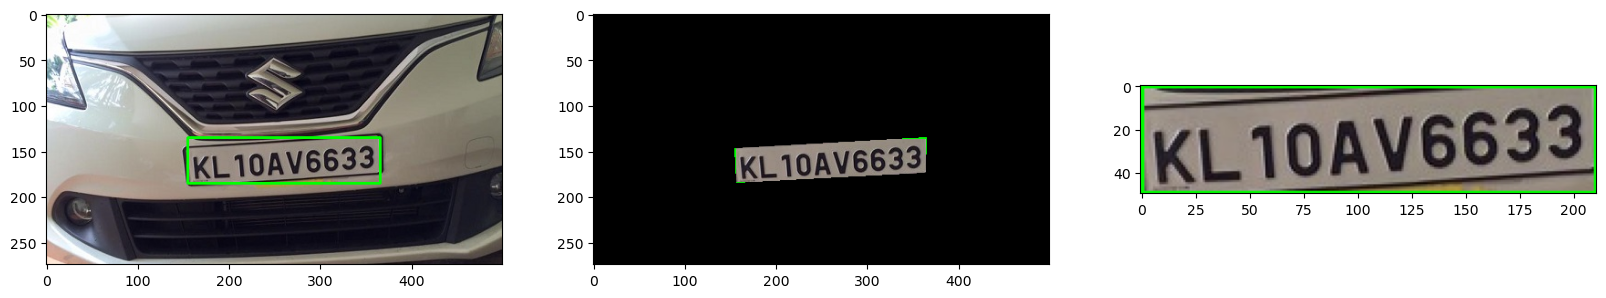

In [6]:
detect_plate('number_plate/google_images/fd0140cc-e887-43b8-a439-24877ea77670___Maruti-Suzuki-Baleno-Number-Plates-Design.jpg.jpeg')

[([[0, 1], [104, 1], [104, 25], [0, 25]], 'HR.ZG.CK8571', 0.34189008814633703)]

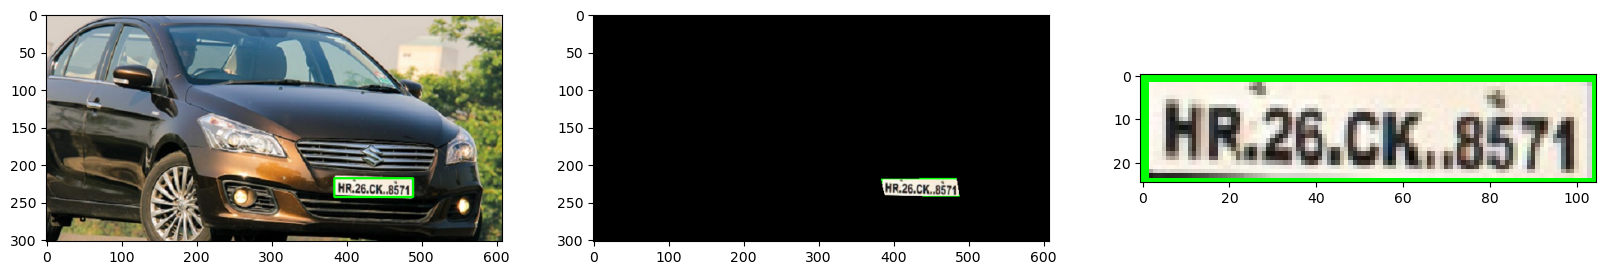

In [8]:
detect_plate('number_plate/google_images/0b24d6ed-d32f-420d-bc18-03deece29073___2015-Maruti-Ciaz-Test-Drive-Review.jpg.jpeg')